In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df=pd.read_csv("C:/Users/HACKER BOY 2.0/Downloads/Zomato Banglore Resturant Data1.csv")
#df1=pd.read_csv("C:/Users/HACKER BOY 2.0/Downloads/Zomato Banglore Resturant Data.1.csv")

In [3]:
df=pd.read_csv("F:\download\zomato.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
 
df.drop(df.columns[[1,4,7,9,10,13,14,15,16]], axis = 1, inplace = True)

#df.dropna(inplace=True)

In [6]:
df.head()

,url,name,online_order,rate,votes,location,cuisines,approx_cost(for two people)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,4.1/5,775,Banashankari,"North Indian, Mughlai, Chinese",800
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,4.1/5,787,Banashankari,"Chinese, North Indian, Thai",800
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,3.8/5,918,Banashankari,"Cafe, Mexican, Italian",800
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,3.7/5,88,Banashankari,"South Indian, North Indian",300
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,3.8/5,166,Basavanagudi,"North Indian, Rajasthani",600


In [7]:
len(df['cuisines'].unique())

2724

In [8]:
def rating(value):
    value=str(value)
    
    if '/' in value:
        value=str(value).split("/")
        value=value[0]
        return float(value)



In [9]:
df['rate']=df['rate'].apply(rating)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
def price(value):
    value=str(value)
    value=value.replace(",","")
    return float(value)

In [11]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(price)

In [12]:
df['approx_cost(for two people)']=df['approx_cost(for two people)']//2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   cuisines                     51672 non-null  object 
 7   approx_cost(for two people)  51371 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.2+ MB


In [14]:
df.isnull().sum()

url                                0
name                               0
online_order                       0
rate                           10052
votes                              0
location                          21
cuisines                          45
approx_cost(for two people)      346
dtype: int64

In [15]:
df['approx_cost(for two people)'].dropna()

0         400.0
1         400.0
2         400.0
3         150.0
4         300.0
          ...  
51712     750.0
51713     300.0
51714    1000.0
51715    1250.0
51716     750.0
Name: approx_cost(for two people), Length: 51371, dtype: float64

In [16]:
df['approx_cost(for two people)'].dropna()

0         400.0
1         400.0
2         400.0
3         150.0
4         300.0
          ...  
51712     750.0
51713     300.0
51714    1000.0
51715    1250.0
51716     750.0
Name: approx_cost(for two people), Length: 51371, dtype: float64

In [17]:
df['rate'].fillna(df['rate'].mean())

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

In [18]:
df.dropna(inplace=True)

In [19]:
df.columns=df.columns.str.replace('approx_cost(for two people)','cost of one person')

In [20]:
df.columns

Index(['url', 'name', 'online_order', 'rate', 'votes', 'location', 'cuisines',
       'cost of one person'],
      dtype='object')

In [21]:
df.columns=df.columns.str.replace("online_order","delivery")

In [22]:
df.columns

Index(['url', 'name', 'delivery', 'rate', 'votes', 'location', 'cuisines',
       'cost of one person'],
      dtype='object')

In [23]:
def delivery(value):
    value=str(value)
    if value=="Yes":
        return 1
    else :
        return 0

In [24]:
def delivery1(value):
    if value=="Yes":
        return 1
    else :
        return None

In [25]:
df['delivery']=df['delivery'].apply(delivery)

In [26]:
df['delivery'].isnull().sum()

0

In [27]:
df=df[df['delivery']!=0]

In [28]:
df['delivery']

0        1
1        1
2        1
5        1
7        1
        ..
51697    1
51699    1
51701    1
51703    1
51705    1
Name: delivery, Length: 27198, dtype: int64

In [29]:
#df.to_excel("zomato_clean_by_gaurav.xlsx",index=False)

In [30]:
area_distribution = df['location'].value_counts()
cheapest_per_cuisine = df.groupby('cuisines')['cost of one person'].min()
expensive_per_cuisine = df.groupby('cuisines')['cost of one person'].max()


In [31]:
cheapest_per_cuisine

cuisines
African, Burger                                                      500.0
African, Burger, Desserts, Beverages, Fast Food                      500.0
American                                                             125.0
American, Asian, Continental, North Indian, South Indian, Chinese    600.0
American, Asian, European, North Indian                              700.0
                                                                     ...  
Turkish, Desserts                                                    125.0
Turkish, Fast Food                                                   175.0
Turkish, Rolls                                                       150.0
Vietnamese                                                           350.0
Vietnamese, Thai, Burmese, Japanese                                  500.0
Name: cost of one person, Length: 1704, dtype: float64

In [32]:
max_delivery_reviews_location = df[df['votes'] > 1000]['location'].value_counts().idxmax()
interesting_insight = df[['rate', 'votes']].corr().loc['rate', 'votes']
max_less_rated_location = df[df['rate'] < 3.0]['location'].value_counts().idxmax()


In [33]:
cheap_expensive_avg_price = df.groupby('location')['cost of one person'].agg(['min', 'max', 'mean'])
num_restaurants_per_cuisine = df['cuisines'].value_counts()


#  number of delivery per location 

In [35]:
area_wise_delivery=df.groupby('location').size()

In [36]:
area_wise_delivery

location
BTM                  2888
Banashankari          471
Banaswadi             297
Bannerghatta Road     828
Basavanagudi          412
                     ... 
West Bangalore          2
Whitefield            961
Wilson Garden         123
Yelahanka               4
Yeshwantpur            91
Length: 90, dtype: int64

In [37]:
area_wise_delivery.idxmax()

'BTM'

In [38]:
btm_deliveries = df[df['location'] == 'BTM']
btm_deliveries.head()

,url,name,delivery,rate,votes,location,cuisines,cost of one person
879,https://www.zomato.com/bangalore/sankranthi-ve...,Sankranthi Veg Restaurant,1,3.0,102,BTM,"South Indian, North Indian, Chinese",300.0
922,https://www.zomato.com/bangalore/eat-fit-btm-b...,eat.fit,1,4.5,1178,BTM,"Healthy Food, North Indian, Biryani, Continent...",250.0
923,https://www.zomato.com/bangalore/sai-abhiruchi...,Sai Abhiruchi,1,3.7,335,BTM,"Andhra, North Indian, Biryani",400.0
924,https://www.zomato.com/bangalore/capsicum-fami...,Capsicum Family Restaurant,1,3.8,254,BTM,"Biryani, North Indian",400.0
928,https://www.zomato.com/bangalore/hiyar-majhe-k...,Hiyar Majhe Kolkata,1,4.0,244,BTM,"Bengali, North Indian",200.0


In [39]:
btm_cuisine_counts = btm_deliveries.groupby('cuisines').size()

In [40]:
print(btm_cuisine_counts.idxmax(),btm_cuisine_counts.max())

North Indian, Chinese 249


# cheapest and expensive price for each types of cuisine. 

In [41]:
cheapest_cuisine =df.groupby("cuisines").min("price of one person")

In [42]:
cheapest_cuisine

,delivery,rate,votes,cost of one person
cuisines,,,,
"African, Burger",1,4.5,404,500.0
"African, Burger, Desserts, Beverages, Fast Food",1,4.6,595,500.0
American,1,2.7,4,125.0
"American, Asian, Continental, North Indian, South Indian, Chinese",1,4.1,322,600.0
"American, Asian, European, North Indian",1,4.3,3848,700.0
...,...,...,...,...
"Turkish, Desserts",1,4.3,62,125.0
"Turkish, Fast Food",1,3.6,22,175.0
"Turkish, Rolls",1,3.7,12,150.0


In [43]:
expensive_cuisine=df.groupby('cuisines').max('price of one person')

In [44]:
expensive_cuisine

,delivery,rate,votes,cost of one person
cuisines,,,,
"African, Burger",1,4.6,592,500.0
"African, Burger, Desserts, Beverages, Fast Food",1,4.6,595,500.0
American,1,3.2,30,250.0
"American, Asian, Continental, North Indian, South Indian, Chinese",1,4.1,332,600.0
"American, Asian, European, North Indian",1,4.3,3890,700.0
...,...,...,...,...
"Turkish, Desserts",1,4.3,70,125.0
"Turkish, Fast Food",1,3.6,22,175.0
"Turkish, Rolls",1,4.1,269,150.0


# maximum number of restaurant where the delivery_review_number is greater than 1000. 

In [45]:
filtered_restaurants = df[df['votes'] > 1000]


# Max and min price of each resturant

In [46]:

min_price=df.groupby('name').min('cost of one person')
max_price=df.groupby('name').max('cost of one person')

In [47]:
location_counts = filtered_restaurants.groupby('location').size()
max_location = location_counts.idxmax()

In [48]:
min_price

,delivery,rate,votes,cost of one person
name,,,,
#L-81 Cafe,1,3.9,48,200.0
#refuel,1,3.7,37,200.0
1000 B.C,1,3.2,49,150.0
11 to 11 Express Biriyanis,1,3.5,22,150.0
1441 Pizzeria,1,4.1,119,400.0
...,...,...,...,...
Zu's Doner Kebaps,1,3.6,22,175.0
Zyara,1,3.8,191,325.0
eat.fit,1,3.9,42,150.0


# Interesting insight

In [49]:
area_wise_delivery.idxmax()

'BTM'

In [50]:
print(btm_cuisine_counts.idxmax(),btm_cuisine_counts.max())

North Indian, Chinese 249


# Area wise distribution 

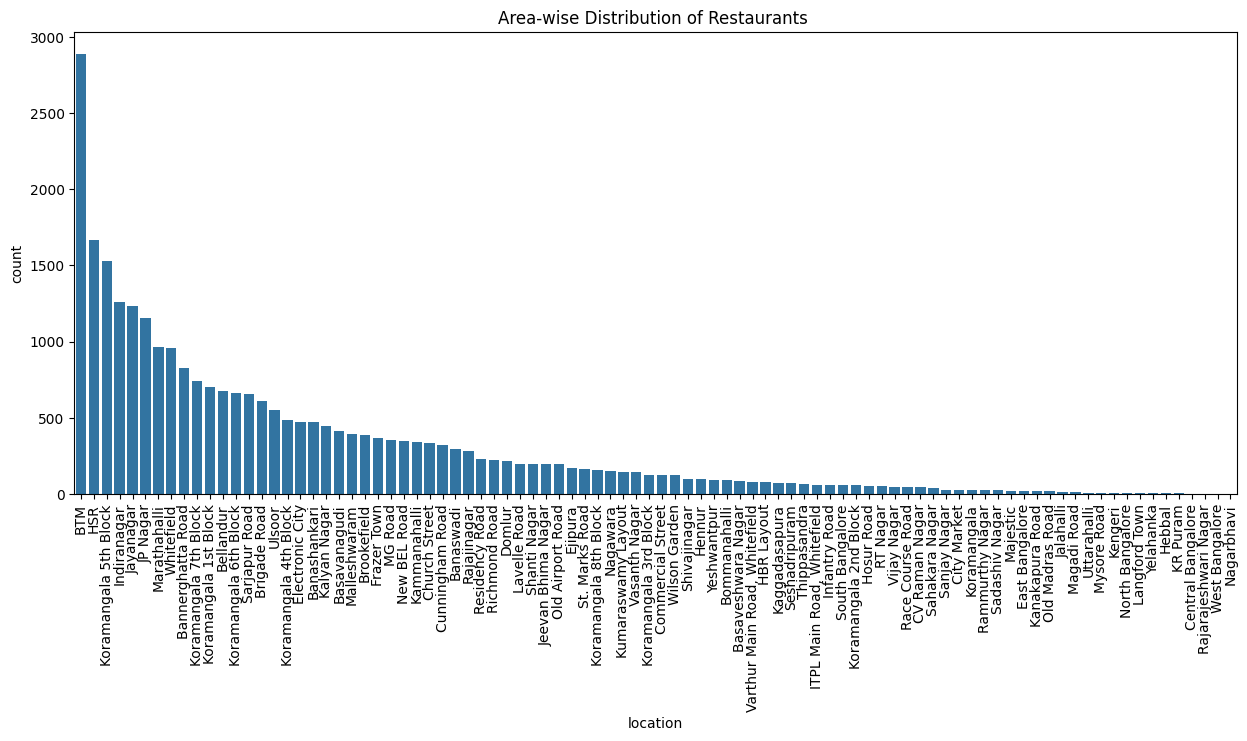

In [56]:
location_counts = df['location'].value_counts()
sorted_locations = location_counts.index.tolist()

# Plotting the count plot
plt.figure(figsize=(15, 6))
sns.countplot(x='location', data=df, order=sorted_locations)
plt.xticks(rotation=90)
plt.title('Area-wise Distribution of Restaurants ')
plt.show()

# BTM top 20 dishes

In [63]:
btm_dishes=df['cuisines'].value_counts()
sorted_btm_cusines =btm_dishes.index.tolist()[:20]


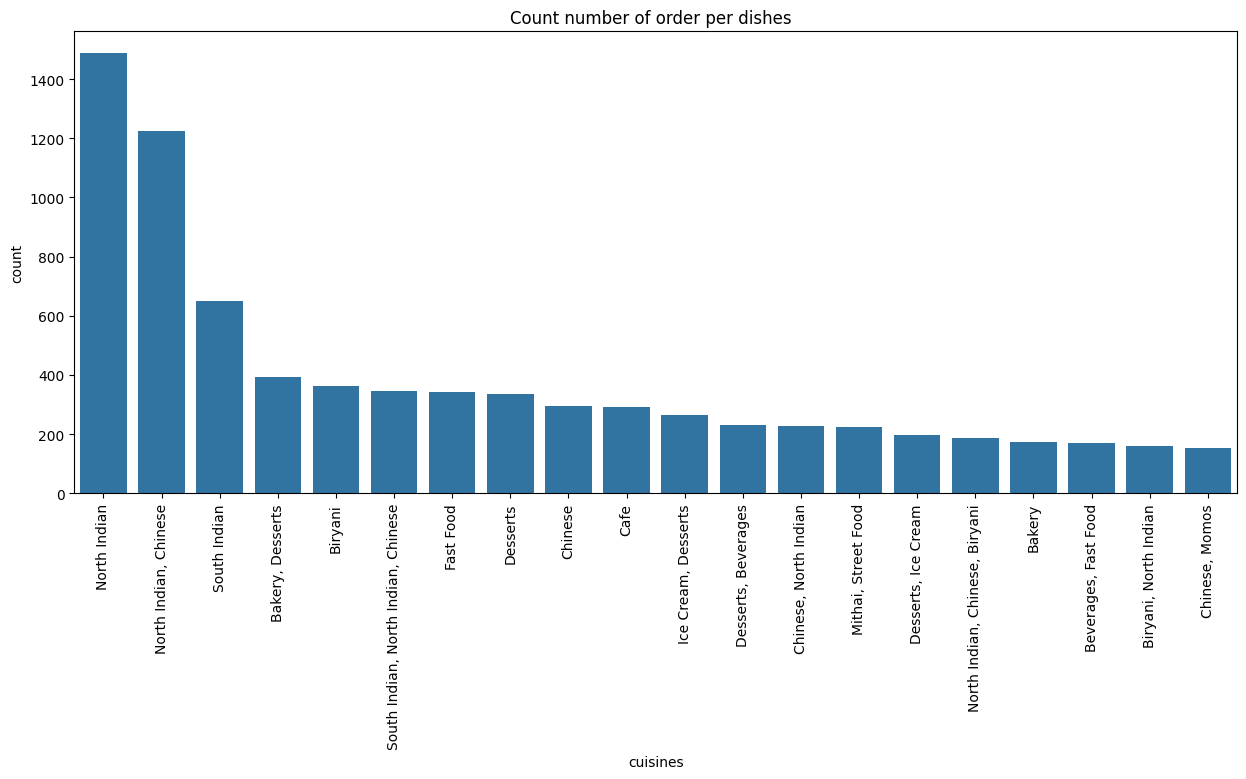

In [68]:
plt.figure(figsize=(15, 6))
sns.countplot(x='cuisines', data=df, order=sorted_btm_cusines)
plt.xticks(rotation=90)
plt.title('Count number of order per dishes  ')
plt.show()